In [22]:
from struct import unpack
import os
import shutil
path = 'MAFDataset/images/'
path2 = 'MAFDataset/images2/'
path3 = 'MAFDataset/images3/'
os.mkdir(path3)
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}

files = os.listdir(path)
for file in files:
    try:
        with open(path+file, 'rb') as f:
            data = f.read()
           
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                break
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break
        #shutil.copyfile(path+file, path2+file)       
    except:
        f.close()
        #shutil.copyfile(path+file, path3+file) 
        os.remove(path+file)

In [34]:
import os
import numpy as np
import cv2
from array import *
import shutil
os.mkdir("MAFDataset/Mask/")
os.mkdir("MAFDataset/noMask/")


path = 'MAFDataset/images/'
files = os.listdir(path)
pathСW = 'MAFDataset/'

l=len(files)

i =0
for file in files:
    file_xml = int(file.split("_")[1])
    if file_xml<3:
        shutil.copyfile(path+file, pathСW+"Mask/"+file)
    else:
        shutil.copyfile(path+file, pathСW+"noMask/"+file)
    i+=1


KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow import keras

batch_size = 32
img_height = 32
img_width = 32
data_dir = 'MAFDataset/im/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 11235 files belonging to 2 classes.
Using 8988 files for training.
Found 11235 files belonging to 2 classes.
Using 2247 files for validation.


In [2]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [3]:
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
first_label = labels_batch[0]
print(first_image)

tf.Tensor(
[[[[0.7421262  0.74996936 0.7303615 ]
   [0.7389706  0.7468137  0.7272059 ]
   [0.75198376 0.7598269  0.74021906]
   ...
   [0.72928923 0.74105394 0.71360296]
   [0.68982846 0.70159316 0.6741422 ]
   [0.72004443 0.73180914 0.70435816]]

  [[0.7384421  0.74628526 0.7266774 ]
   [0.66214    0.66998315 0.6503753 ]
   [0.72407323 0.7436811  0.72015166]
   ...
   [0.7096124  0.71745557 0.6978477 ]
   [0.72745097 0.7352941  0.71568626]
   [0.7214078  0.7410156  0.71356463]]

  [[0.74460787 0.752451   0.7406863 ]
   [0.72734374 0.7469516  0.7312653 ]
   [0.7563726  0.7759804  0.76029414]
   ...
   [0.6968137  0.71642154 0.69289213]
   [0.71906406 0.7386719  0.7151425 ]
   [0.70183825 0.7214461  0.6979167 ]]

  ...

  [[0.7365426  0.62269455 0.591322  ]
   [0.67058825 0.5647059  0.5372549 ]
   [0.63909316 0.5292892  0.5136029 ]
   ...
   [0.5152037  0.36226255 0.36740962]
   [0.76936275 0.65563726 0.6752451 ]
   [0.50927544 0.375697   0.37189797]]

  [[0.6629902  0.5296569  0.494362

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt



model = tf.keras.Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),  
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = "sigmoid")
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [14]:
epoc=24
model.compile(optimizer='adam',loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit( train_ds, validation_data=val_ds, epochs=epoc)


Epoch 1/24
281/281 [==============================] - 125s 434ms/step - loss: 0.3350 - accuracy: 0.8437 - val_loss: 0.2338 - val_accuracy: 0.9043
Epoch 2/24
281/281 [==============================] - 110s 385ms/step - loss: 0.1486 - accuracy: 0.9454 - val_loss: 0.1283 - val_accuracy: 0.9524
Epoch 3/24
281/281 [==============================] - 117s 409ms/step - loss: 0.1084 - accuracy: 0.9615 - val_loss: 0.1172 - val_accuracy: 0.9568
Epoch 4/24
281/281 [==============================] - 134s 469ms/step - loss: 0.0773 - accuracy: 0.9727 - val_loss: 0.1012 - val_accuracy: 0.9666
Epoch 5/24
281/281 [==============================] - 135s 468ms/step - loss: 0.0599 - accuracy: 0.9787 - val_loss: 0.0862 - val_accuracy: 0.9711
Epoch 6/24
281/281 [==============================] - 67s 224ms/step - loss: 0.0500 - accuracy: 0.9830 - val_loss: 0.1227 - val_accuracy: 0.9631
Epoch 7/24
281/281 [==============================] - 32s 112ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0769 - v

In [8]:
epochs=3
history = model.fit( train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
281/281 [==============================] - 30s 104ms/step - loss: 0.0357 - accuracy: 0.9869 - val_loss: 0.0754 - val_accuracy: 0.9773
Epoch 2/3
281/281 [==============================] - 29s 102ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0790 - val_accuracy: 0.9795
Epoch 3/3
281/281 [==============================] - 29s 103ms/step - loss: 0.0188 - accuracy: 0.9932 - val_loss: 0.0962 - val_accuracy: 0.9769


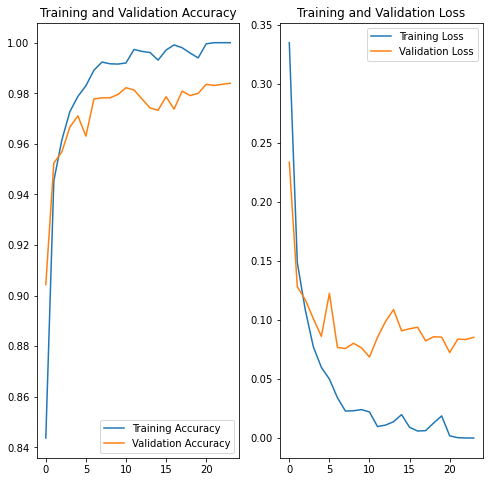

In [15]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoc)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
data_path = 'MAFDataset/t4.jpg'
img = tf.keras.utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

img_array/=255


img_array

<tf.Tensor: shape=(1, 32, 32, 3), dtype=float32, numpy=
array([[[[0.6431373 , 0.5137255 , 0.47843137],
         [0.654902  , 0.53333336, 0.5137255 ],
         [0.6666667 , 0.5529412 , 0.52156866],
         ...,
         [0.92156863, 0.827451  , 0.8117647 ],
         [0.9372549 , 0.84313726, 0.827451  ],
         [0.95686275, 0.8627451 , 0.84705883]],

        [[0.6627451 , 0.5176471 , 0.49411765],
         [0.6666667 , 0.5372549 , 0.5176471 ],
         [0.6666667 , 0.5529412 , 0.5294118 ],
         ...,
         [0.91764706, 0.8235294 , 0.8156863 ],
         [0.92941177, 0.8352941 , 0.827451  ],
         [0.9372549 , 0.84313726, 0.8352941 ]],

        [[0.6627451 , 0.5254902 , 0.5019608 ],
         [0.6784314 , 0.5568628 , 0.54509807],
         [0.68235296, 0.5686275 , 0.54509807],
         ...,
         [0.88235295, 0.8       , 0.7882353 ],
         [0.8862745 , 0.8039216 , 0.7921569 ],
         [0.9098039 , 0.8156863 , 0.80784315]],

        ...,

        [[0.1764706 , 0.03529412, 0.

In [27]:
predictions = model.predict(img_array)
score = predictions[0]
if(score>0.3):
    print("nomask")
else:
    print("mask")

print(score)

mask
[1.3751109e-16]


In [28]:
model.save("my_model.h5", include_optimizer=False)

In [3]:
#import tensorflow as tf
from tensorflow.keras import models,utils
from tensorflow import expand_dims

batch_size = 32
img_height = 32
img_width = 32

new_model = models.load_model('my_model.h5')

# Check its architecture
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [4]:
i=0
predictionsM =[]
predictionsN =[]

for image_batch, labels_batch in val_ds:
    #first_image = image_batch
    #first_label = labels_batch
    #print(first_image)
    
    for j in range (32):
        try:
            first_image = image_batch[j]
            first_label = labels_batch[j]
        except:     
            break
          
        i=i+1
        img_array = utils.img_to_array(first_image)
        img_array = expand_dims(img_array, 0) # Create a batch
        
        predictions = new_model.predict(img_array)
        score = predictions[0]
        if(first_label==0):
            predictionsM.append(score)
        else:
            predictionsN.append(score)

print (i)

2247


G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarnin

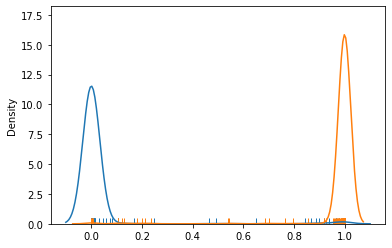

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(data = predictionsM,color="0")
#sns.boxplot(data = predictionsN,color="1")
sns.distplot(predictionsM,hist=False, rug=True )
sns.distplot(predictionsN,hist=False, rug=True)
#plt.plot(predictionsM)
#plt.plot(predictionsN)
#plt.show()

In [15]:
data_path = 'Test/000090_4_000090_MALE_20.jpg'
img = utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = utils.img_to_array(img)
img_array = expand_dims(img_array, 0) # Create a batch
img_array/=255

predictions = new_model.predict(img_array)
score = predictions[0]
if(score>0.3):
    print("nomask")
else:
    print("mask")

print(score)


mask
[0.01015201]


In [7]:
from struct import unpack
import os
import shutil
path = 'Test/'
path2 = 'Testout/'

os.mkdir(path2)


files = os.listdir(path)
for file in files:
   # try:
        img = utils.load_img(
        path+file, target_size=(img_height, img_width)
        )
        img_array = utils.img_to_array(img)
        img_array = expand_dims(img_array, 0) # Create a batch
        img_array/=255

        predictions = new_model.predict(img_array)
        score = predictions[0]
        
        file_xml = int(file.split("_")[1])
        #if (file_xml<3) and (score>0.3):
        #    shutil.copyfile(path+file, path2+file)
            
        if (file_xml<3) == (score>0.3):
            shutil.copyfile(path+file, path2+file)
          
        
   # except:
        #f.close()
        #shutil.copyfile(path+file, path3+file) 
        #os.remove(path+file)

In [3]:
new_model.save("my_model.h5", include_optimizer=False)

In [15]:
from struct import unpack
import os
import shutil
i=0
predictionsM =[]
predictionsN =[]

path = 'Test/'
files = os.listdir(path)
for file in files:
    #first_image = image_batch
    #first_label = labels_batch
    #print(first_image)
    first_image = utils.load_img(
        path+file, target_size=(img_height, img_width)
        )
    first_label = int(file.split("_")[1])
   
    img_array = utils.img_to_array(first_image)
    img_array = expand_dims(img_array, 0) # Create a batch
    img_array/=255
          
    i=i+1
       
    predictions = new_model.predict(img_array)
    score = predictions[0]
    #print(first_label)
    if(first_label<3):
        predictionsM.append(score)
    else:
        predictionsN.append(score)

print (i)

399


G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
G:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarnin

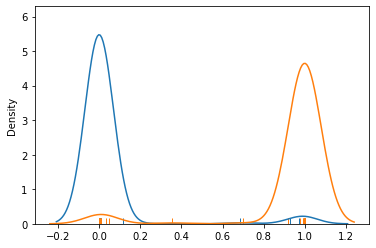

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(data = predictionsM,color="0")
#sns.boxplot(data = predictionsN,color="1")
sns.distplot(predictionsM,hist=False, rug=True )
sns.distplot(predictionsN,hist=False, rug=True)